# Центральная предельная теорема на примере Распределение Релэя
###  Ссылка на русский раздел (ошибки в формулах дисперсии и матожидании)
#### https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A0%D1%8D%D0%BB%D0%B5%D1%8F

###  Ссылка на английский раздел
#### https://en.wikipedia.org/wiki/Rayleigh_distribution



### Распределение вероятностей
$$f(x,\sigma)=\frac{x}{{\sigma^2}}\exp{(-\frac{x^2}{2\sigma^2})}, x\geqslant0, \sigma>0$$
### Функция распределения
$$P(X\leqslant x)=1-\exp(\frac{x^2}{2\sigma^2}), x\geqslant0,\sigma>0$$

Где $$\sigma - параметр \ масштаба$$

### Математическое ожидание
$$\sigma\sqrt{\frac{\pi}{2}}$$

### Дисперсия
$$(4-\pi/2)\sigma^2$$

In [202]:
# Необходимые импорты
from scipy.stats import rayleigh
from scipy.stats import norm
import matplotlib.pyplot as plt
from math import sqrt
from math import pi
import numpy as np

In [203]:
# Функция возращает среднее значение выборки масштабом scale размером 
def rand_avg(scale,size):
    return sum (rayleigh.rvs(scale=scale,size=size))/size

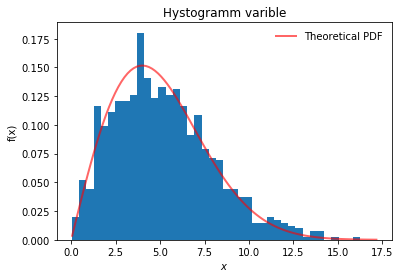

In [231]:
#init varibale
mean, var, skew, kurt = rayleigh.stats(moments='mvsk')
#scale factor
sl=4
#dispersia
dispersion=(4-pi/2)*sl

n1=[rayleigh.rvs(scale=sl) for i in range (1000)]
plt.hist(n1,bins=40, normed=True)
x = np.linspace(rayleigh.ppf(0.0001,scale=sl),rayleigh.ppf(0.9999,scale=sl), 100)
plt.plot(x, rayleigh.pdf(x,scale=sl),'r-', lw=2, alpha=0.6, label='Theoretical PDF')
plt.title("Hystogramm varible")
plt.ylabel('f(x)')
plt.xlabel('$x$')

plt.legend(loc='best', frameon=False)
plt.show()

### Расчёты для $$\sigma=4$$
#### Матожидание

$$\sigma\sqrt{\frac{\pi}{2}} = 4 * \sqrt{\pi/2}$$ 
#### Выборочная дисперсия для n=5
$$\frac{\frac{4-\pi}{2}*4}{5}$$
#### Выборочная дисперсия для n=10
$$\frac{\frac{4-\pi}{2}*4}{10}$$
#### Выборочная дисперсия для n=50
$$\frac{\frac{4-\pi}{2}*4}{50}$$

#### Выборочная дисперсия для n=100
$$\frac{\frac{4-\pi}{2}*4}{100}$$


In [218]:
n5= [(rand_avg)(sl,5) for i in range (1000)]
n10= [(rand_avg)(sl,10) for i in range (1000)]
n50 = [(rand_avg)(sl,50) for i in range (1000)]
n100 = [(rand_avg)(sl,100) for i in range (1000)]
mat_ozhid=sl*sqrt(pi/2)
print "Матожидание",mat_ozhid
print "Дисперсия для  n=5",dispersion/5
print "Дисперсия для n=10",dispersion/10
print "Дисперсия для n=50",dispersion/50
print "Дисперсия для n=100",dispersion/100


Матожидание 5.01325654926
Дисперсия для  n=5 1.94336293856
Дисперсия для n=10 0.971681469282
Дисперсия для n=50 0.194336293856
Дисперсия для n=100 0.0971681469282


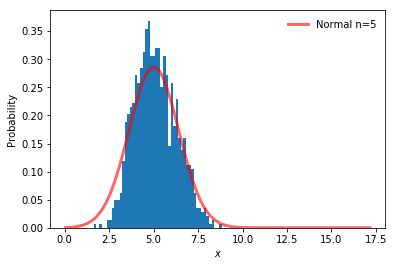

In [235]:
#Гистрограмма для n=5
plt.hist(n5,bins=50, normed=True)
n=5
plt.legend(loc='best', frameon=False)
scale= sqrt(dispersion/n)
plt.plot(x, norm.pdf(x,loc=mat_ozhid,scale=scale),'r-', lw=3, alpha=0.6, label='Normal n=5')
plt.legend(loc='best', frameon=False)
plt.ylabel('Probability')
plt.xlabel('$x$')
plt.show()

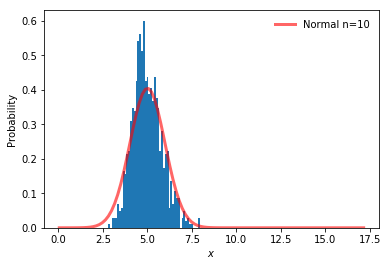

In [228]:
#Гистрограмма для n=10
n=10
plt.hist(n10,bins=50, normed=True)
plt.legend(loc='best', frameon=False)
scale= sqrt(dispersion/n)
plt.plot(x, norm.pdf(x,loc=mat_ozhid,scale=scale),'r-', lw=3, alpha=0.6, label='Normal n=10')
plt.legend(loc='best', frameon=False)
plt.ylabel('Probability')
plt.xlabel('$x$')
plt.show()


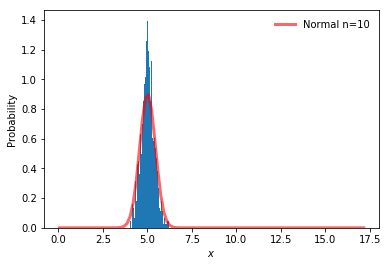

In [227]:
#Гистрограмма для n=50
n=50
plt.hist(n50,bins=50, normed=True)
plt.legend(loc='best', frameon=False)
scale= sqrt(dispersion/n)
plt.plot(x, norm.pdf(x,loc=mat_ozhid,scale=scale),'r-', lw=3, alpha=0.6, label='Normal n=10')
plt.ylabel('Probability')
plt.xlabel('$x$')
plt.legend(loc='best', frameon=False)
plt.show()

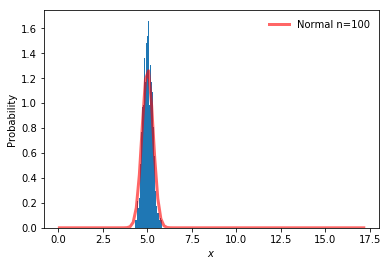

In [226]:
#Гистрограмма для n=100
n=100
plt.hist(n100,bins=30, normed=True)
plt.legend(loc='best', frameon=False)
scale= sqrt(dispersion/n)
plt.plot(x, norm.pdf(x,loc=mat_ozhid,scale=scale),'r-', lw=3, alpha=0.6, label='Normal n=100')
plt.ylabel('Probability')
plt.xlabel('$x$')
plt.legend(loc='best', frameon=False)
plt.show()

### Выводы
### при выборке n=10 распределение средних уже  ложится на нормальное распределение, подтверждая центральную предельную теорему. При увеличении выборки распределение растёт вверх вместе с нормальным распределением 